To draw the connection graph and bubble plot for teams match infor. And also try to use tSNE to visualize the teams' attributes and players attributes.  
  
1. Connection graph: Use the matches within each league and use the line to show the total goals scored. The more two teams' goals scored the thicker the line will be. 
2. Bubble plot is drawn in Tableau. To show the goals scored in home team for different league.
3. tSNE to visualize the player's all attributes and the team's all attributes. 

In [1]:
# import
import sqlite3
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import os

import plotly.graph_objs as go
import sys
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
from mpl_toolkits.basemap import Basemap

In [3]:
# collect data
df = pd.read_csv("../temp_table_final_proj/EU_soccer_match_info.csv",index_col=0)

In [4]:
# get only data for manutd.
team_aga_MUN = df[(df.League_name == "England Premier League") & (df.home_team_name2 == 'MUN')][["home_team_name1","away_team_name1","home_team_goal","away_team_goal"]]

In [5]:
team_aga_MUN_aggregate = team_aga_MUN.groupby(by="away_team_name1").sum()

In [6]:
team_aga_MUN_aggregate["Total_goals_btw_two_teams"] = team_aga_MUN_aggregate["home_team_goal"] + team_aga_MUN_aggregate["away_team_goal"]

In [7]:
team_cities = ["London","Birmingham", "Birmingham","Blackburn","Blackpool","Bolton","Bournemouth","Burnley","Cardiff",
              "London","London","Liverpool","London","York","Leicester","Liverpool","Manchester","Middlesbrough",
              "Newcastle","Norwich","Portsmouth","London","Reading","Southampton","Stoke",'Sunderland',
              "Swansea","London","Watford","Birmingham","London","Wigan","Wolverhampton"]


In [8]:
# add Burnley: 53.7893° N, 2.2405° W and Watford: 51.6565° N, 0.3903° W to final city_geo_info.
team_aga_MUN_aggregate.index.values

array(['Arsenal', 'Aston Villa', 'Birmingham City', 'Blackburn Rovers',
       'Blackpool', 'Bolton Wanderers', 'Bournemouth', 'Burnley',
       'Cardiff City', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham',
       'Hull City', 'Leicester City', 'Liverpool', 'Manchester City',
       'Middlesbrough', 'Newcastle United', 'Norwich City', 'Portsmouth',
       'Queens Park Rangers', 'Reading', 'Southampton', 'Stoke City',
       'Sunderland', 'Swansea City', 'Tottenham Hotspur', 'Watford',
       'West Bromwich Albion', 'West Ham United', 'Wigan Athletic',
       'Wolverhampton Wanderers'], dtype=object)

In [9]:
# get the cordinates for city.
city_geo_info = pd.read_csv("../temp_table_final_proj/simplemaps_worldcities_basicv1.5/worldcities.csv")
uk_city = city_geo_info[city_geo_info.country == "United Kingdom"]

In [10]:
team_cit_geo = uk_city[uk_city.city.isin(team_cities)][["city","lat","lng"]].reset_index().drop(columns="index")

In [11]:
team_city_geo = team_cit_geo.append(pd.DataFrame([["Burnley","53.7893","2.2405"],["Watford","51.6565","0.3903"]],columns=["city","lat","lng"]),ignore_index=True)

In [12]:
most_exct_games = team_aga_MUN_aggregate.sort_values(by="Total_goals_btw_two_teams",ascending=False).head(10)

In [13]:
# build the 
most_exct_games.reset_index(inplace=True)

In [14]:
# build dict on city and team
team_city_dict = dict(zip(team_aga_MUN_aggregate.index.values,team_cities))

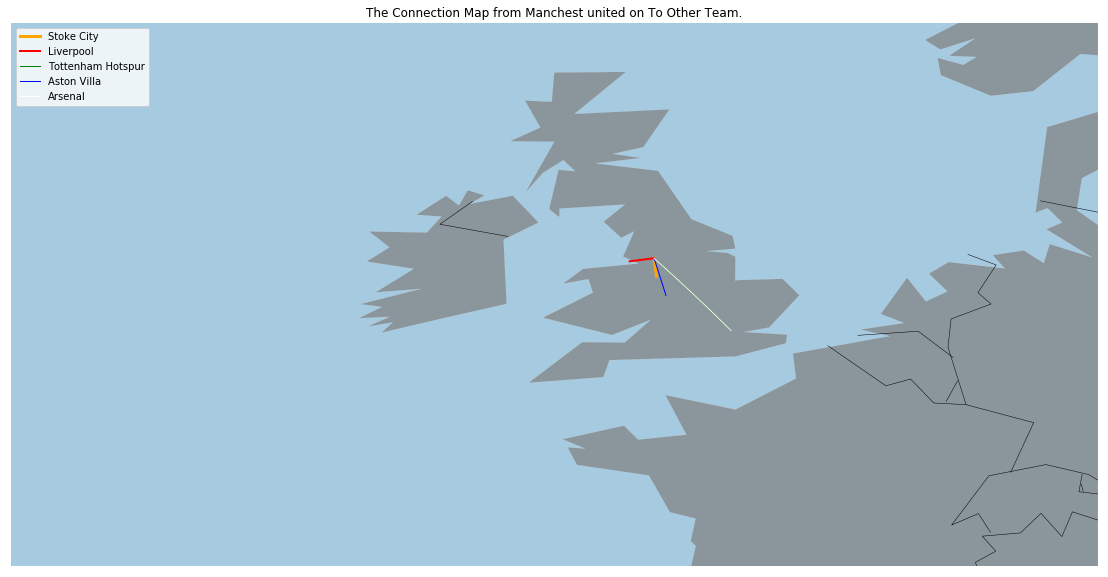

In [15]:
plt.figure(figsize=(20,10))
# write function to get connection map
# A basic map
m=Basemap(llcrnrlon=-20, llcrnrlat=45,urcrnrlon=10,urcrnrlat=60)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
m.drawcountries(linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
# Add a connection between new york and London
st_geo = team_city_geo[team_city_geo.city==team_city_dict[most_exct_games.iloc[0,0]]]
ed_geo = team_city_geo[team_city_geo.city==team_city_dict[most_exct_games.iloc[1,0]]]
ed_geo2 = team_city_geo[team_city_geo.city==team_city_dict[most_exct_games.iloc[2,0]]]
ed_geo3 = team_city_geo[team_city_geo.city==team_city_dict[most_exct_games.iloc[3,0]]]
ed_geo4 = team_city_geo[team_city_geo.city==team_city_dict[most_exct_games.iloc[4,0]]]
ed_geo5 = team_city_geo[team_city_geo.city==team_city_dict[most_exct_games.iloc[5,0]]]

m.drawgreatcircle(st_geo.iloc[0,2],st_geo.iloc[0,1],ed_geo.iloc[0,2],ed_geo.iloc[0,1], linewidth=3, color='orange')
m.drawgreatcircle(st_geo.iloc[0,2],st_geo.iloc[0,1],ed_geo2.iloc[0,2],ed_geo2.iloc[0,1], linewidth=2, color='red')
m.drawgreatcircle(st_geo.iloc[0,2],st_geo.iloc[0,1],ed_geo3.iloc[0,2],ed_geo3.iloc[0,1], linewidth=1, color='green')
m.drawgreatcircle(st_geo.iloc[0,2],st_geo.iloc[0,1],ed_geo4.iloc[0,2],ed_geo4.iloc[0,1], linewidth=1, color='blue')
m.drawgreatcircle(st_geo.iloc[0,2],st_geo.iloc[0,1],ed_geo5.iloc[0,2],ed_geo5.iloc[0,1], linewidth=1, color='white')

plt.title("The Connection Map from Manchest united on To Other Team.");
plt.legend(most_exct_games.away_team_name1[1:6].values)
plt.show()

In [16]:
most_exct_games

,away_team_name1,home_team_goal,away_team_goal,Total_goals_btw_two_teams
0,Manchester City,14,17,31
1,Stoke City,25,6,31
2,Liverpool,16,13,29
3,Tottenham Hotspur,20,8,28
4,Aston Villa,21,6,27
5,Arsenal,18,7,25
6,Everton,14,6,20
7,Newcastle United,12,7,19
8,Fulham,14,4,18
9,Hull City,14,4,18


In [17]:
from sklearn import manifold, datasets

In [24]:
hw_team = pd.read_csv("../temp_table_final_proj/home_team.csv")

In [33]:
hw_team.fillna(method="backfill",inplace=True)

In [36]:

tsne = manifold.TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(hw_team.iloc[:-1,2:])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 187 samples in 0.000s...
[t-SNE] Computed neighbors for 187 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 187 / 187
[t-SNE] Mean sigma: 8.671805
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.063053
[t-SNE] KL divergence after 300 iterations: 0.851208


In [39]:
hw_team_1  = hw_team.iloc[:-1,:].copy()

In [40]:
import seaborn as sns

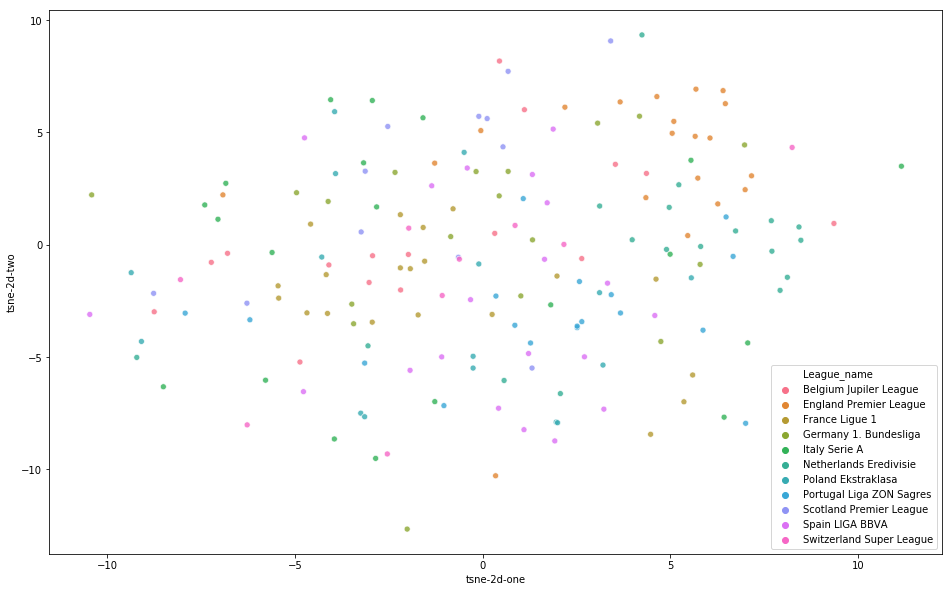

In [50]:
hw_team_1['tsne-2d-one'] = tsne_results[:,0]
hw_team_1['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="League_name",
#     palette=sns.color_palette("hls", 10),
    data=hw_team_1,
    legend="full",
    alpha=0.8
)

In [20]:
# write function to get tSNE
